## Çok degişkenli ayrkırı gözlem analizi

### Local Outlier Factor

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

In [3]:
import seaborn as sns 
diamonds=sns.load_dataset('diamonds')
diamonds=diamonds.select_dtypes(include=['float64','int64'])
df=diamonds.copy()
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


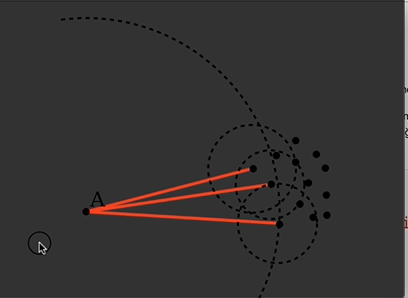

In [8]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [9]:
clf=LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [10]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [11]:
df_scores=clf.negative_outlier_factor_#yogunluk skoru 

In [12]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [13]:
np.sort(df_scores)[0:20]#önce sort ettik ,sonra ilk 20 ye bakıcaz

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [14]:
np.sort(df_scores[0:20])

array([-1.62278873, -1.59732899, -1.58352526, -1.33002541, -1.30712521,
       -1.28428162, -1.28422952, -1.28408436, -1.27351342, -1.26458706,
       -1.23611906, -1.21093135, -1.20830179, -1.17637026, -1.14305176,
       -1.13307628, -1.13060731, -1.11364018, -1.08139269, -1.08093519])

In [15]:
np.sort(df_scores)[13]#küçükten büyüge sıralarken 13. degeri aldık 

-3.823787967755565

In [16]:
esik_deger=np.sort(df_scores)[13]

In [17]:
aykiri_tf=df_scores>esik_deger

In [18]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

### silme yöntemi

In [19]:
yeni_df=df[df_scores>esik_deger]#burada eşik degerin üzerindeki degerleri aldık,aykırı olmayan degerler degil 

In [20]:
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [21]:
df[df_scores<esik_deger]#bunlarda aykırı olan degerlerdir

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


### Baskılma Yöntemi

In [22]:
df[df_scores == esik_deger] #bir eşik deger scoru belirledik

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [36]:
baski_deger=df[df_scores<esik_deger]

In [37]:
aykirilar=df[~aykiri_tf]

In [38]:
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [39]:
aykirilar.to_records(index=False)

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [40]:
res=aykirilar.to_records(index=False)

In [41]:
res [:] = baski_deger.to_records(index=False)

ValueError: could not broadcast input array from shape (13) into shape (14)

In [46]:
import pandas as pd

df[~aykiri_tf]=pd.DataFrame(res,index=df[~aykiri_tf].index)

In [47]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
